In [1]:
import joblib
import numpy as np
import librosa
import matplotlib.pyplot as plt 
import glob
import os
import pandas as pd

# Getting the log-mel spectrogram based on the raw VLA data of 1 channel

In [2]:
raw_path = r'../../data/swellex_real_vla_ts_data/channel_1.pkl'

with open(raw_path, 'rb') as f:
    raw_data = joblib.load(f)

In [3]:
# Every 1500 samples is 1 second
first_second_raw_data = raw_data[:1500]
raw_data_mel_spectrogram = librosa.feature.melspectrogram(
    y=first_second_raw_data,
    sr=1500,
    n_fft=1024,
    hop_length=20,
    win_length=2*20,
    window='hann',
)
raw_data_db_mel_spectrogram = librosa.power_to_db(raw_data_mel_spectrogram)

[Text(0.5, 1.0, 'Log Mel-frequency Spectrogram of 1 spectrogram on First Channel')]

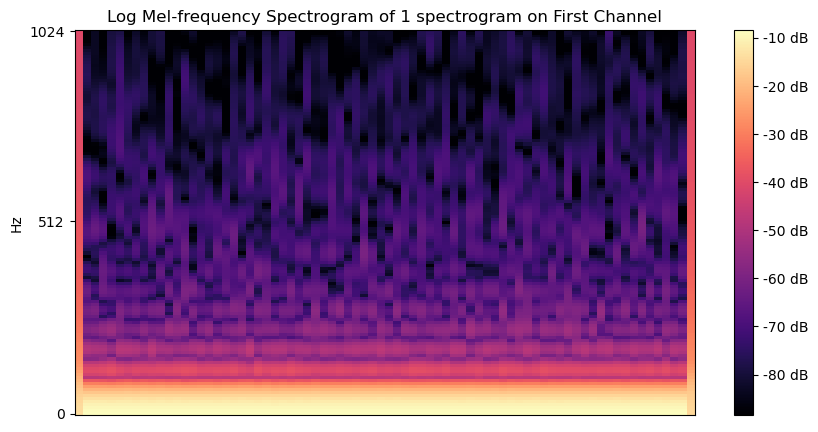

In [4]:
raw_data_fig, raw_data_ax = plt.subplots()
raw_data_fig.set_size_inches(10, 5)
raw_data_img = librosa.display.specshow(
    raw_data_db_mel_spectrogram, 
    x_axis=None,
    y_axis='mel', 
    sr=1500,
    fmax=1024, 
    ax=raw_data_ax
)
raw_data_fig.colorbar(raw_data_img, ax=raw_data_ax, format='%+2.0f dB')
raw_data_ax.set(title='Log Mel-frequency Spectrogram of 1 spectrogram on First Channel')

# Getting the log-mel spectrogram based on the raw VLA data of all channels

In [5]:
raw_directory = r'../../data/swellex_real_vla_ts_data/'

channels = []
for file in glob.glob(raw_directory + r'channel_*.pkl'):
    print(f'Opening channel {file}')
    with open(file, 'rb') as f:
        raw_data = joblib.load(f)
        channels.append(raw_data)

Opening channel ../../data/swellex_real_vla_ts_data/channel_1.pkl
Opening channel ../../data/swellex_real_vla_ts_data/channel_10.pkl
Opening channel ../../data/swellex_real_vla_ts_data/channel_11.pkl
Opening channel ../../data/swellex_real_vla_ts_data/channel_12.pkl
Opening channel ../../data/swellex_real_vla_ts_data/channel_13.pkl
Opening channel ../../data/swellex_real_vla_ts_data/channel_14.pkl
Opening channel ../../data/swellex_real_vla_ts_data/channel_15.pkl
Opening channel ../../data/swellex_real_vla_ts_data/channel_16.pkl
Opening channel ../../data/swellex_real_vla_ts_data/channel_17.pkl
Opening channel ../../data/swellex_real_vla_ts_data/channel_18.pkl
Opening channel ../../data/swellex_real_vla_ts_data/channel_19.pkl
Opening channel ../../data/swellex_real_vla_ts_data/channel_2.pkl
Opening channel ../../data/swellex_real_vla_ts_data/channel_20.pkl
Opening channel ../../data/swellex_real_vla_ts_data/channel_21.pkl
Opening channel ../../data/swellex_real_vla_ts_data/channel_3.pk

In [6]:
combined_channels = np.zeros(len(channels[0]))#[0] * len(channels[0])
for channel_number, channel in enumerate(channels):
    print(f'Processing channel {channel_number+1}')
    for i, value in enumerate(channel):
        combined_channels[i] = combined_channels[i] + value

Processing channel 1
Processing channel 2
Processing channel 3
Processing channel 4
Processing channel 5
Processing channel 6
Processing channel 7
Processing channel 8
Processing channel 9
Processing channel 10
Processing channel 11
Processing channel 12
Processing channel 13
Processing channel 14
Processing channel 15
Processing channel 16
Processing channel 17
Processing channel 18
Processing channel 19
Processing channel 20
Processing channel 21


In [7]:
# Every 1500 samples is 1 second
first_second_combined_channels = combined_channels[:1500]
combined_channels_mel_spectrogram = librosa.feature.melspectrogram(
    y=first_second_combined_channels,
    sr=1500,
    n_fft=1024,
    hop_length=20,
    win_length=2*20,
    window='hann',
)
combined_channels_db_mel_spectrogram = librosa.power_to_db(combined_channels_mel_spectrogram)

[Text(0.5, 1.0, 'DB Mel-frequency Spectrogram of 1 spectrogram with Combined Channels')]

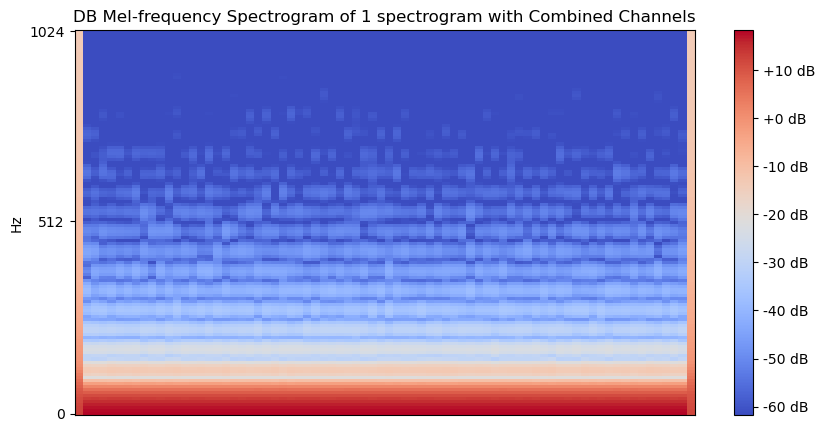

In [8]:
combined_channels_fig, combined_channels_ax = plt.subplots()
combined_channels_fig.set_size_inches(10, 5)
combined_channels_img = librosa.display.specshow(
    combined_channels_db_mel_spectrogram, 
    x_axis=None,
    y_axis='mel', 
    sr=1500,
    fmax=1024, 
    ax=combined_channels_ax
)
combined_channels_fig.colorbar(combined_channels_img, ax=combined_channels_ax, format='%+2.0f dB')
combined_channels_ax.set(title='DB Mel-frequency Spectrogram of 1 spectrogram with Combined Channels')

# Getting the log-mel spectrogram based on real VLA using Quoc's preprocessor

In [9]:
real_mel_spectrogram_path = r'/mnt/active_storage/Joe/preprocessed_data/realvla_1/swellex-6folds-real-vla.pkl'

with open(real_mel_spectrogram_path, 'rb') as f:
    real_mel_spectrogram_data = joblib.load(f)

In [10]:
real_mel_spectrogram_data_fold_0 = pd.DataFrame(real_mel_spectrogram_data[0], columns=['name', 'target', 'waveform'])

[Text(0.5, 1.0, 'Log-mel frequency spectrogram of 1 simuchunk spectrogram with extra db conversion')]

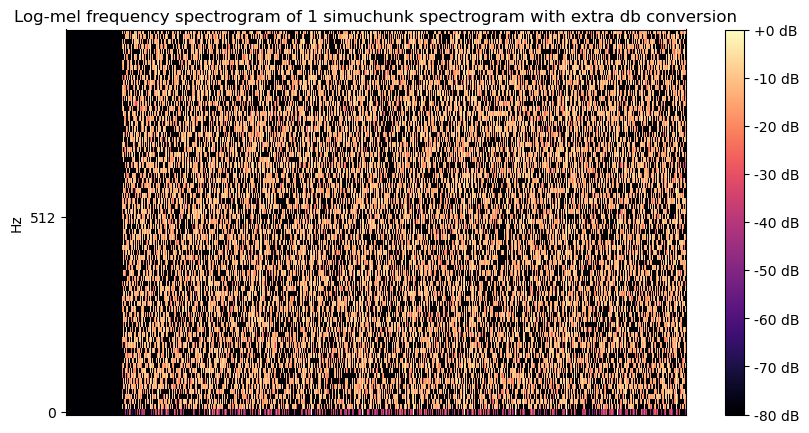

In [11]:
real_fold_0_fig, real_fold_0_ax = plt.subplots()
real_fold_0_fig.set_size_inches(10, 5)
real_mel_dB = librosa.power_to_db(real_mel_spectrogram_data_fold_0['waveform'][0], ref=np.max)
real_fold_0_img = librosa.display.specshow(
    real_mel_dB,
    x_axis=None,
    y_axis='mel', 
    sr=1500,
    fmax=1000, 
    ax=real_fold_0_ax
)
real_fold_0_fig.colorbar(real_fold_0_img, ax=real_fold_0_ax, format='%+2.0f dB')
real_fold_0_ax.set(title='Log-mel frequency spectrogram of 1 simuchunk spectrogram with extra db conversion')

[Text(0.5, 1.0, 'Log-mel frequency spectrogram of 1 real spectrogram without extra db conversion')]

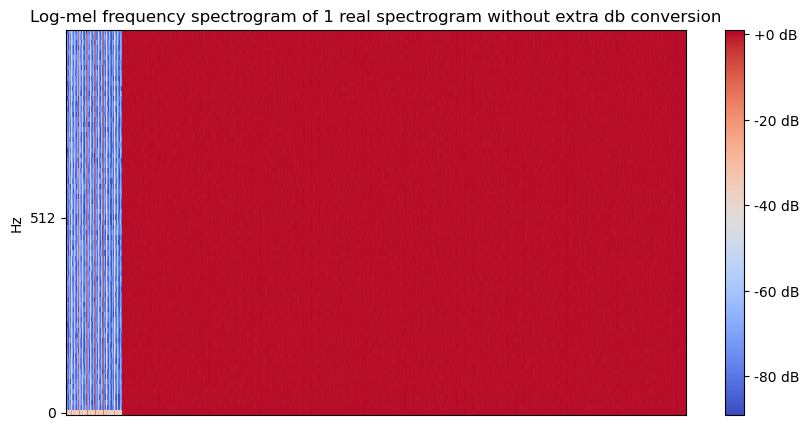

In [12]:
real_fold_0_fig, real_fold_0_ax = plt.subplots()
real_fold_0_fig.set_size_inches(10, 5)
real_fold_0_img = librosa.display.specshow(
    real_mel_spectrogram_data_fold_0['waveform'][0],
    x_axis=None,
    y_axis='mel', 
    sr=1500,
    fmax=1000, 
    ax=real_fold_0_ax
)
real_fold_0_fig.colorbar(real_fold_0_img, ax=real_fold_0_ax, format='%+2.0f dB')
real_fold_0_ax.set(title='Log-mel frequency spectrogram of 1 real spectrogram without extra db conversion')

# Getting the log-mel spectrogram based on 1 spectrogram of simuchunk data using Quoc's preprocessor

In [13]:
simuchunk_mel_spectrogram_path = r'/mnt/active_storage/Joe/preprocessed_data/simuchunk_1/swellex-6folds-simuchunk.pkl'

with open(simuchunk_mel_spectrogram_path, 'rb') as f:
    simuchunk_mel_spectrogram_data = joblib.load(f)

In [14]:
simuchunk_mel_spectrogram_data_fold_0 = pd.DataFrame(simuchunk_mel_spectrogram_data[0], columns=['name', 'target', 'waveform'])

[Text(0.5, 1.0, 'Log-mel frequency spectrogram of 1 simuchunk spectrogram with extra db conversion')]

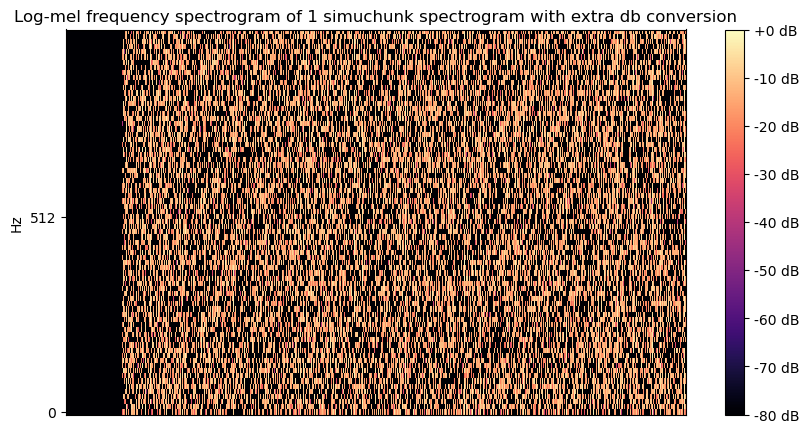

In [15]:
simuchunk_fold_0_fig, simuchunk_fold_0_ax = plt.subplots()
simuchunk_fold_0_fig.set_size_inches(10, 5)
simuchunk_dB = librosa.power_to_db(simuchunk_mel_spectrogram_data_fold_0['waveform'][0], ref=np.max)
simuchunk_fold_0_img = librosa.display.specshow(
    simuchunk_dB,
    x_axis=None,
    y_axis='mel', 
    sr=1500,
    fmax=1000, 
    ax=simuchunk_fold_0_ax
)
simuchunk_fold_0_fig.colorbar(simuchunk_fold_0_img, ax=simuchunk_fold_0_ax, format='%+2.0f dB')
simuchunk_fold_0_ax.set(title='Log-mel frequency spectrogram of 1 simuchunk spectrogram with extra db conversion')

[Text(0.5, 1.0, 'Log-mel frequency spectrogram of 1 simuchunk spectrogram without extra db conversion')]

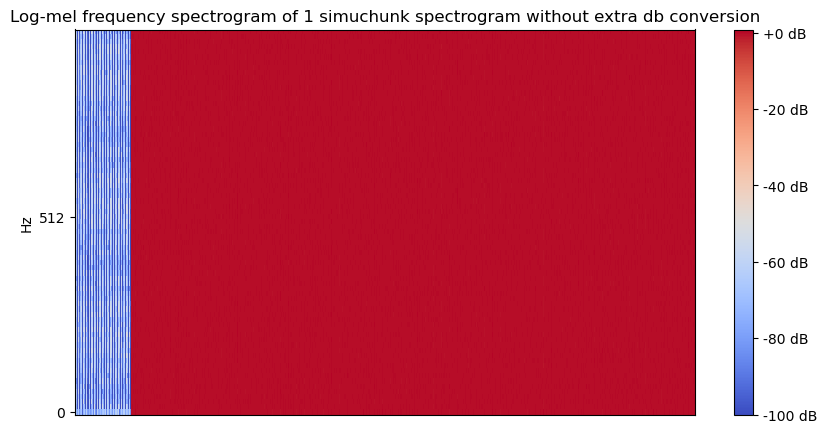

In [16]:
simuchunk_fold_0_fig, simuchunk_fold_0_ax = plt.subplots()
simuchunk_fold_0_fig.set_size_inches(10, 5)
simuchunk_fold_0_img = librosa.display.specshow(
    simuchunk_mel_spectrogram_data_fold_0['waveform'][0], # Viewing the first second
    x_axis=None,
    y_axis='mel', 
    sr=1500,
    fmax=1000, 
    ax=simuchunk_fold_0_ax
)
simuchunk_fold_0_fig.colorbar(simuchunk_fold_0_img, ax=simuchunk_fold_0_ax, format='%+2.0f dB')
simuchunk_fold_0_ax.set(title='Log-mel frequency spectrogram of 1 simuchunk spectrogram without extra db conversion')

# Getting the log-mel spectrogram based on 1 simuchunk spectrogram without Quoc's preprocessor using all channels

In [17]:
raw_simu_path = r'../../data/simulated_chunked_time_series_data/features/'

simu_channels = []
for file in glob.glob(raw_simu_path + r'channel_*.pkl'):
    print(f'Opening channel {file}')
    with open(file, 'rb') as f:
        raw_simu_data = joblib.load(f)
        simu_channels.append(raw_simu_data)

Opening channel ../../data/simulated_chunked_time_series_data/features/channel_1.pkl
Opening channel ../../data/simulated_chunked_time_series_data/features/channel_10.pkl
Opening channel ../../data/simulated_chunked_time_series_data/features/channel_11.pkl
Opening channel ../../data/simulated_chunked_time_series_data/features/channel_12.pkl
Opening channel ../../data/simulated_chunked_time_series_data/features/channel_13.pkl
Opening channel ../../data/simulated_chunked_time_series_data/features/channel_14.pkl
Opening channel ../../data/simulated_chunked_time_series_data/features/channel_15.pkl
Opening channel ../../data/simulated_chunked_time_series_data/features/channel_16.pkl
Opening channel ../../data/simulated_chunked_time_series_data/features/channel_17.pkl
Opening channel ../../data/simulated_chunked_time_series_data/features/channel_18.pkl
Opening channel ../../data/simulated_chunked_time_series_data/features/channel_19.pkl
Opening channel ../../data/simulated_chunked_time_serie

In [19]:
combined_simu_channels = np.zeros((len(simu_channels[0]), len(simu_channels[0][0])))

for channel_number, channel in enumerate(simu_channels):
    print(f'Processing channel {channel_number+1}')
    for g, spectrogram in enumerate(channel):
        combined_simu_channels[g] = combined_simu_channels[g] + spectrogram

10000
Processing channel 1
Processing channel 2
Processing channel 3
Processing channel 4
Processing channel 5
Processing channel 6
Processing channel 7
Processing channel 8
Processing channel 9
Processing channel 10
Processing channel 11
Processing channel 12
Processing channel 13
Processing channel 14
Processing channel 15
Processing channel 16
Processing channel 17
Processing channel 18
Processing channel 19
Processing channel 20
Processing channel 21
[[-4.17699374e-04 -5.93498873e-04 -6.03303355e-04 ...  5.35157729e-04
   3.11670834e-04 -7.81139191e-05]
 [-6.11702797e-04 -6.01158386e-04 -5.47798335e-04 ...  2.53752833e-04
  -1.39207318e-04 -4.62379204e-04]
 [-6.02132386e-04 -5.47374462e-04 -5.07113406e-04 ... -1.62782911e-04
  -4.81584583e-04 -6.21519992e-04]
 ...
 [-1.53552112e-05 -7.04273022e-03 -6.48695713e-03 ... -2.34788245e-03
   3.11385872e-04  4.20457273e-03]
 [-7.43380479e-03 -6.25332840e-03 -3.12844329e-03 ...  8.75864423e-04
   4.41259052e-03 -6.18211231e-04]
 [-5.565370

In [20]:
# Every 1500 samples is 1 second
first_second_combined_simu_channels = combined_simu_channels[0]
combined_simu_channels_mel_spectrogram = librosa.feature.melspectrogram(
    y=first_second_combined_simu_channels,
    sr=1502,
    n_fft=1024,
    hop_length=20,
    win_length=2*20,
    window='hann',
)
combined_simu_channels_db_mel_spectrogram = librosa.power_to_db(combined_simu_channels_mel_spectrogram)

[Text(0.5, 1.0, 'DB Mel-frequency Spectrogram of 1 spectrogram with Combined Simu Channels')]

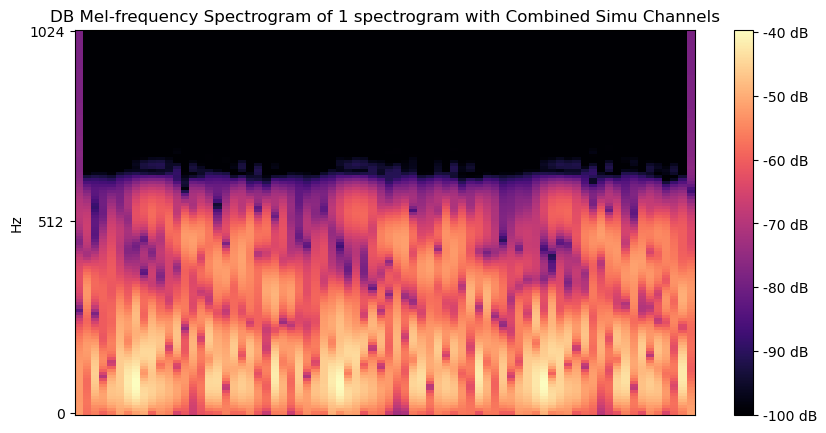

In [21]:
combined_simu_channels_fig, combined_simu_channels_ax = plt.subplots()
combined_simu_channels_fig.set_size_inches(10, 5)
combined_simu_channels_img = librosa.display.specshow(
    combined_simu_channels_db_mel_spectrogram, 
    x_axis=None,
    y_axis='mel', 
    sr=1500,
    fmax=1024, 
    ax=combined_simu_channels_ax
)
combined_simu_channels_fig.colorbar(combined_simu_channels_img, ax=combined_simu_channels_ax, format='%+2.0f dB')
combined_simu_channels_ax.set(title='DB Mel-frequency Spectrogram of 1 spectrogram with Combined Simu Channels')

# Getting the log-mel spectrogram based on 1 simuchunk spectrogram without Quoc's preprocessor using 1 channel

In [29]:
channel_1_simu_path = r'../../data/simulated_chunked_time_series_data/features/channel_1.pkl'

with open(channel_1_simu_path, 'rb') as f:
        channel_1_simu_raw_data = joblib.load(f)

In [32]:
# Every 1500 samples is 1 second
channel_1_simu_first_spectrogram = channel_1_simu_raw_data[0]
channel_1_simu_first_mel_spectrogram = librosa.feature.melspectrogram(
    y=channel_1_simu_first_spectrogram,
    sr=1502,
    n_fft=1024,
    hop_length=20,
    win_length=2*20,
    window='hann',
)
channel_1_simu_db_mel_spectrogram = librosa.power_to_db(channel_1_simu_first_mel_spectrogram)

[Text(0.5, 1.0, 'DB Mel-frequency Spectrogram of 1 spectrogram with 1 Simu Channels')]

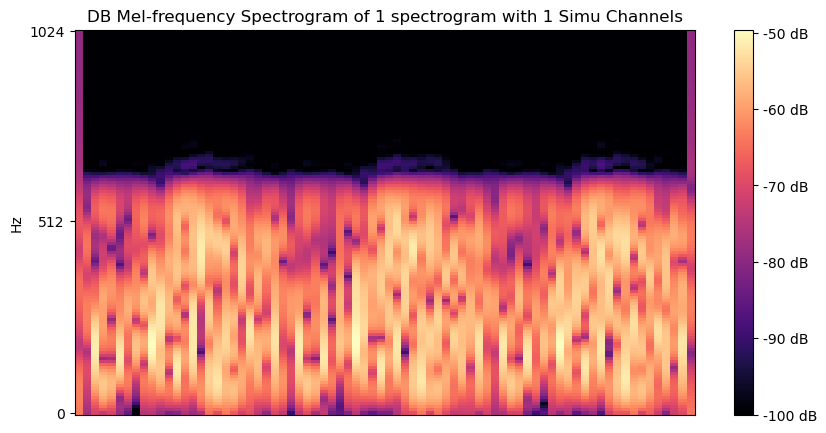

In [33]:
channel_1_simu_fig, channel_1_simu_ax = plt.subplots()
channel_1_simu_fig.set_size_inches(10, 5)
channel_1_simu_img = librosa.display.specshow(
    channel_1_simu_db_mel_spectrogram, 
    x_axis=None,
    y_axis='mel', 
    sr=1500,
    fmax=1024, 
    ax=channel_1_simu_ax
)
channel_1_simu_fig.colorbar(channel_1_simu_img, ax=channel_1_simu_ax, format='%+2.0f dB')
channel_1_simu_ax.set(title='DB Mel-frequency Spectrogram of 1 spectrogram with 1 Simu Channels')